In [ ]:
#preprpcessing text
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens if token not in stop_words]
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#loading txt
texts = []
file_paths = ['/Users/rebeccafan/Downloads/us immigration/ads_on_immigration_NBC.txt',
              '//Users/rebeccafan/Downloads/us immigration/BIDEN_TRUMP_IMMIGRATION_POLICY_BBC.txt',
              '/Users/rebeccafan/Downloads/us immigration/Fueling_US_Economic_Growth_Bloomberg.txt',
              '/Users/rebeccafan/Downloads/us immigration/governor_migrants_FOX.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigrant_worker_protection_Baltimore_USATODAY.txt',
              '/Users/rebeccafan/Downloads/us immigration/Immigrants_Benefit_Taxpayers_Forbes.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigration_downsides_CNN.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigration_election_ABC.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigration_fillip_Reuters.txt',
              '/Users/rebeccafan/Downloads/us immigration/keep_block_on_law_Washingtonpost.txt']
for path in file_paths:
    with open(path, 'r', encoding='utf-8') as file:
        texts.append(preprocess_text(file.read()))


In [ ]:
#create text matrix
from gensim import corpora

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
#topic modeling with LDA, 10 topics
from gensim.models import LdaMulticore

num_topics = 10
lda_model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Display the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.027*"biden" + 0.023*"trump" + 0.021*"border" + 0.016*"said" + 0.015*"mr" + 0.014*"immigr" + 0.013*"administr" + 0.011*"migrant" + 0.011*"issu" + 0.010*"republican"')
(1, '0.001*"immigr" + 0.001*"said" + 0.001*"biden" + 0.001*"u" + 0.001*"growth" + 0.001*"border" + 0.001*"trump" + 0.001*"issu" + 0.001*"year" + 0.001*"migrant"')
(2, '0.030*"immigr" + 0.018*"estim" + 0.015*"budget" + 0.014*"cbo" + 0.011*"would" + 0.011*"fiscal" + 0.010*"clemen" + 0.010*"approach" + 0.009*"benefit" + 0.009*"increas"')
(3, '0.030*"texa" + 0.028*"law" + 0.024*"state" + 0.020*"court" + 0.014*"immigr" + 0.012*"said" + 0.011*"appeal" + 0.010*"decis" + 0.009*"border" + 0.009*"u"')
(4, '0.019*"immigr" + 0.016*"worker" + 0.016*"said" + 0.016*"program" + 0.012*"u" + 0.012*"parol" + 0.010*"state" + 0.009*"work" + 0.009*"migrant" + 0.008*"nation"')
(5, '0.001*"immigr" + 0.001*"u" + 0.001*"said" + 0.001*"year" + 0.001*"growth" + 0.001*"border" + 0.001*"worker" + 0.001*"biden" + 0.001*"peopl" + 0.001*"law"')
(6,

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
# Calculate Model Coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)

Coherence Score:  0.40173057036736654


In [ ]:
pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata

In [ ]:
#visual the topics
import gensim
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/rebeccafan/Downloads/us immigration'+str(num_topics))

# Prepare the LDA visualization
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the data to disk
with open(LDAvis_data_filepath.replace('.html', '.pkl'), 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# Load the prepared data
with open(LDAvis_data_filepath.replace('.html', '.pkl'), 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Save the visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, '/Users/rebeccafan/Downloads/us immigration'+str(num_topics)+'.html')

print("LDA visualization saved to {}".format(LDAvis_data_filepath))
LDAvis_prepared

LDA visualization saved to /Users/rebeccafan/Downloads/us immigration10


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.106436 -0.044024       1        1  26.884312
0     -0.100046  0.092505       2        1  23.284001
4     -0.070574 -0.097650       3        1  17.631257
3     -0.103065 -0.135637       4        1  13.744943
2      0.209629  0.013192       5        1  12.853291
9     -0.081853  0.124173       6        1   5.535016
5      0.010155  0.011348       7        1   0.016795
7      0.009352  0.011713       8        1   0.016795
1      0.009689  0.012148       9        1   0.016795
6      0.010277  0.012232      10        1   0.016795, topic_info=        Term       Freq      Total Category  logprob  loglift
24     biden  65.000000  65.000000  Default  30.0000  30.0000
185    trump  43.000000  43.000000  Default  29.0000  29.0000
412     texa  29.000000  29.000000  Default  28.0000  28.0000
305      law  32.000000  32.000000  Default  27.0000  27.0000
532   growth  29.000000  29.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
664  without   0.000589  11.563911  Topic10  -7.4361  -1.1939
532   growth   0.000593  29.190420  Topic10  -7.4278  -2.1115
326       mr   0.000592  21.786179  Topic10  -7.4308  -1.8220
329   nation   0.000591  20.372208  Topic10  -7.4327  -1.7567
827     work   0.000590  18.578041  Topic10  -7.4334  -1.6653

[722 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1301      2  0.950042     abc
0         1  0.497600  accord
0         2  0.049760  accord
0         3  0.199040  accord
0         4  0.049760  accord
...     ...       ...     ...
669       1  0.681157    year
669       2  0.154808    year
669       3  0.030962    year
669       4  0.092885    year
669       5  0.061923    year

[766 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 5, 4, 3, 10, 6, 8, 2, 7])

In [ ]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 6.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#sentiment analysis
from textblob import TextBlob

document_names = [
    "ads_on_immigration_NBC",
    "BIDEN_TRUMP_IMMIGRATION_POLICY_BBC",
    "Fueling_US_Economic_Growth_Bloomberg",
    "governor_migrants_FOX",
    "immigrant_worker_protection_Baltimore_USATODAY",
    "Immigrants_Benefit_Taxpayers_Forbes",
    "immigration_downsides_CNN",
    "immigration_election_ABC",
    "immigration_fillip_Reuters",
    "keep_block_on_law_Washingtonpost"
]


document_sentiments = []

for text in texts:

    text_string = ' '.join(text)
    blob = TextBlob(text_string)
    document_sentiments.append(blob.sentiment)

# Calculate average polarity and subjectivity across all documents
avg_polarity = sum([sentiment.polarity for sentiment in document_sentiments]) / len(document_sentiments)
avg_subjectivity = sum([sentiment.subjectivity for sentiment in document_sentiments]) / len(document_sentiments)

print(f"Average Polarity across all documents: {avg_polarity}")
print(f"Average Subjectivity across all documents: {avg_subjectivity}")

for name, sentiment in zip(document_names, document_sentiments):
    print(f"{name} - Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")


Average Polarity across all documents: 0.07258973173758451
Average Subjectivity across all documents: 0.33807271041237086
ads_on_immigration_NBC - Polarity: 0.19704410173160172, Subjectivity: 0.30177895021645024
BIDEN_TRUMP_IMMIGRATION_POLICY_BBC - Polarity: 0.09051529909484457, Subjectivity: 0.325741833923652
Fueling_US_Economic_Growth_Bloomberg - Polarity: 0.06984848484848485, Subjectivity: 0.30176346801346793
governor_migrants_FOX - Polarity: 0.031253529079616045, Subjectivity: 0.3511452315800141
immigrant_worker_protection_Baltimore_USATODAY - Polarity: -0.028188775510204076, Subjectivity: 0.4128826530612245
Immigrants_Benefit_Taxpayers_Forbes - Polarity: 0.037323747680890515, Subjectivity: 0.3624907235621522
immigration_downsides_CNN - Polarity: 0.0171907040328093, Subjectivity: 0.2617196400091137
immigration_election_ABC - Polarity: 0.18601048951048949, Subjectivity: 0.3720606060606059
immigration_fillip_Reuters - Polarity: 0.10267817059483729, Subjectivity: 0.35883978675645334
k

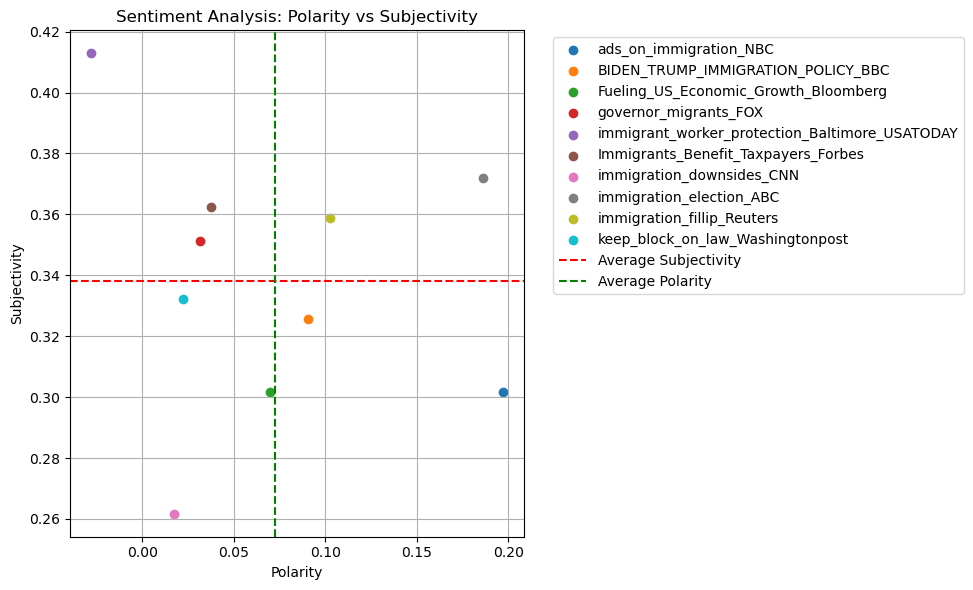

In [ ]:
import matplotlib.pyplot as plt

# Extract polarity and subjectivity scores for plotting
polarities = [sentiment.polarity for sentiment in document_sentiments]
subjectivities = [sentiment.subjectivity for sentiment in document_sentiments]

# Create scatter plot
plt.figure(figsize=(10, 6))
for i, (polarity, subjectivity) in enumerate(zip(polarities, subjectivities)):
    plt.scatter(polarity, subjectivity, label=document_names[i])

# Customize the plot
plt.title('Sentiment Analysis: Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.axhline(y=avg_subjectivity, color='r', linestyle='--', label='Average Subjectivity')
plt.axvline(x=avg_polarity, color='g', linestyle='--', label='Average Polarity')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
#Sentiment-Bearing Words anlaysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def identify_sentiment_words(tokens):
    sentiment_words = {'positive': [], 'negative': []}

    # Join tokens into a string if necessary
    text = ' '.join(tokens)  # Assuming `tokens` is a list of tokens (words)
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            word_score = sia.polarity_scores(word)['compound']
            sentence_score = sia.polarity_scores(sentence)['compound']

            if word_score > 0.1 and sentence_score > 0.1:
                sentiment_words['positive'].append(word)
            elif word_score < -0.1 and sentence_score < -0.1:
                sentiment_words['negative'].append(word)

    return sentiment_words

def identify_sentiment_words_direct(tokens):
    sentiment_words = {'positive': [], 'negative': []}

    for word in tokens:
        word_score = sia.polarity_scores(word)['compound']

        if word_score > 0.1:
            sentiment_words['positive'].append(word)
        elif word_score < -0.1:
            sentiment_words['negative'].append(word)

    return sentiment_words


for i, tokens in enumerate(texts):
    sentiment_words = identify_sentiment_words(tokens)
    print(f"Document: {document_names[i]}")
    print("Positive sentiment words:", set(sentiment_words['positive']))
    print("Negative sentiment words:", set(sentiment_words['negative']), "\n")




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Document: ads_on_immigration_NBC
Positive sentiment words: set()
Negative sentiment words: {'slam', 'fault', 'rapist', 'battleground', 'critic', 'hell', 'problem', 'crime', 'poison', 'stop'} 

Document: BIDEN_TRUMP_IMMIGRATION_POLICY_BBC
Positive sentiment words: set()
Negative sentiment words: {'restrict', 'overwhelm', 'lawsuit', 'threat', 'arrest', 'tout', 'critic', 'ban', 'detain', 'crush', 'fire', 'barrier', 'stall', 'fear', 'shame', 'stop'} 

Document: Fueling_US_Economic_Growth_Bloomberg
Positive sentiment words: {'sure', 'stronger', 'share', 'benefit', 'help', 'gain', 'strong', 'play', 'support', 'thank', 'care', 'fresh', 'growth', 'legal', 'like', 'boost', 'expand'}
Negative sentiment words: set() 

Document: governor_migrants_FOX
Positive sentiment words: {'stronger', 'clear', 'top', 'safe', 'highlight', 'legal', 'expand', 'admit', 'certain', 'robust', 'success', 'join', 'creation', 'urgent', 'support', 'protect', 'benefit', 'hope', 'allow'}
Negative sentiment words: set() 

D

In [ ]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


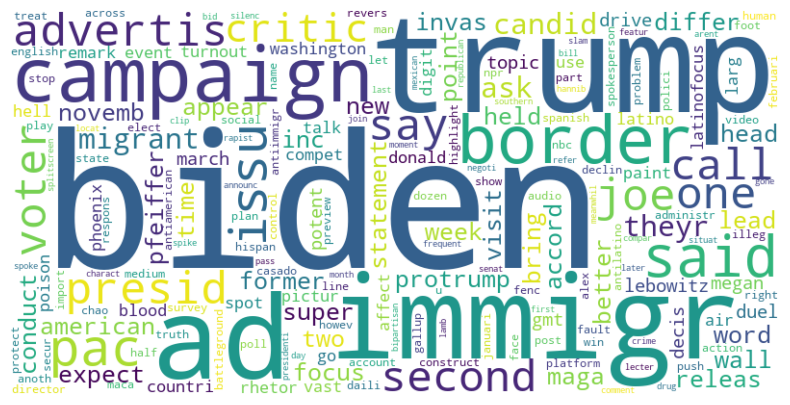

In [ ]:
#visualize with worldcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the first document
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(texts[0]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
